In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import NuSVR, SVR, LinearSVR
from sklearn.model_selection import cross_val_score, validation_curve, StratifiedKFold, GridSearchCV

data = pd.read_csv('bitcoin_dataset.csv')
test = pd.read_csv('test_set.csv')

In [2]:
for col in data.columns[1:]:
    data.rename(columns={col:col[4:]}, inplace = True)

for col in test.columns[1:]:
    test.rename(columns={col:col[4:]}, inplace=True)

In [3]:
print(data.columns)
print(test.columns)

Index(['Date', 'market_price', 'total_bitcoins', 'market_cap', 'trade_volume',
       'blocks_size', 'avg_block_size', 'n_orphaned_blocks',
       'n_transactions_per_block', 'median_confirmation_time', 'hash_rate',
       'difficulty', 'miners_revenue', 'transaction_fees',
       'cost_per_transaction_percent', 'cost_per_transaction',
       'n_unique_addresses', 'n_transactions', 'n_transactions_total',
       'n_transactions_excluding_popular',
       'n_transactions_excluding_chains_longer_than_100', 'output_volume',
       'estimated_transaction_volume', 'estimated_transaction_volume_usd'],
      dtype='object')
Index(['Date', 'total_bitcoins', 'market_cap', 'trade_volume', 'blocks_size',
       'avg_block_size', 'n_orphaned_blocks', 'n_transactions_per_block',
       'median_confirmation_time', 'hash_rate', 'difficulty', 'miners_revenue',
       'transaction_fees', 'cost_per_transaction_percent',
       'cost_per_transaction', 'n_unique_addresses', 'n_transactions',
       'n_tra

In [4]:
print(100*data.isnull().sum().sum() / data.shape[0]) #4% overall nulls in train
print(100*test.isnull().sum().sum() / test.shape[0]) #0% here

3.9573296627666896
0.0


In [5]:
test.head()

,Date,total_bitcoins,market_cap,trade_volume,blocks_size,avg_block_size,n_orphaned_blocks,n_transactions_per_block,median_confirmation_time,hash_rate,...,cost_per_transaction_percent,cost_per_transaction,n_unique_addresses,n_transactions,n_transactions_total,n_transactions_excluding_popular,n_transactions_excluding_chains_longer_than_100,output_volume,estimated_transaction_volume,estimated_transaction_volume_usd
0,2/1/2018 0:00,16839687.5,1.529590e+11,1.509688e+09,154613.2244,1.053963,0,1610.400000,12.475000,20703947.91,...,0.799509,78.049647,591550,257664,296946448,249466,179686,2.190613e+06,276923.3207,2.515366e+09
1,2/2/2018 0:00,16841787.5,1.499240e+11,2.213437e+09,154785.0008,1.022479,0,1404.273810,11.225000,21739145.31,...,0.717894,89.591902,551198,235918,297182366,229894,155128,1.460796e+06,330740.2192,2.944217e+09
2,2/3/2018 0:00,16843762.5,1.528850e+11,9.524038e+08,154942.4583,0.996567,0,1233.487342,10.475000,20445148.56,...,1.290914,98.824757,436196,194891,297377257,184856,131568,9.100425e+05,164374.0244,1.491970e+09
3,2/4/2018 0:00,16845987.5,1.415170e+11,1.080683e+09,155118.7652,0.990488,0,975.769663,9.275000,23033142.05,...,1.208997,112.999677,396694,173687,297550944,165753,125143,9.722485e+05,193244.2140,1.623377e+09
4,2/5/2018 0:00,16848300.0,1.152220e+11,1.793319e+09,155322.7709,1.102733,0,1169.529730,6.133333,23938939.78,...,0.967008,78.586115,486553,216363,297767307,208757,144850,1.848913e+06,257109.2993,1.758323e+09


In [6]:
test.tail()

,Date,total_bitcoins,market_cap,trade_volume,blocks_size,avg_block_size,n_orphaned_blocks,n_transactions_per_block,median_confirmation_time,hash_rate,...,cost_per_transaction_percent,cost_per_transaction,n_unique_addresses,n_transactions,n_transactions_total,n_transactions_excluding_popular,n_transactions_excluding_chains_longer_than_100,output_volume,estimated_transaction_volume,estimated_transaction_volume_usd
9,2/10/2018 0:00,16857300.0,1.402510e+11,918540174.5,156085.9522,1.034792,0,1271.209790,9.450000,20434818.87,...,1.614559,85.874632,421547,181783,298758078,177603,133091,1537986.400,116211.04860,9.668616e+08
10,2/11/2018 0:00,16859187.5,1.406640e+11,796391653.7,156237.9970,1.006919,0,974.887417,7.533333,21578025.52,...,2.272316,110.491753,368624,147208,298905286,144165,108927,1398605.054,85791.95132,7.158013e+08
11,2/12/2018 0:00,16861262.5,1.485700e+11,836623674.3,156410.8514,1.041292,0,1126.012048,10.200000,23721537.99,...,1.184872,101.114203,437380,186918,299092204,183345,133062,1674741.825,181029.65410,1.595114e+09
12,2/13/2018 0:00,16863312.5,1.449870e+11,188454378.6,156580.2562,1.032956,0,1115.756098,11.050000,23435736.33,...,1.441899,99.544224,414749,182984,299275188,179616,128687,1315762.899,146929.34580,1.263264e+09
13,2/14/2018 0:00,16865550.0,1.574340e+11,915165499.8,156762.0906,1.015835,0,1097.301676,10.225000,25579248.80,...,1.553881,109.366318,450367,196417,299471605,192621,140594,1557016.979,148097.50310,1.382436e+09


In [7]:
data.head()

,Date,market_price,total_bitcoins,market_cap,trade_volume,blocks_size,avg_block_size,n_orphaned_blocks,n_transactions_per_block,median_confirmation_time,...,cost_per_transaction_percent,cost_per_transaction,n_unique_addresses,n_transactions,n_transactions_total,n_transactions_excluding_popular,n_transactions_excluding_chains_longer_than_100,output_volume,estimated_transaction_volume,estimated_transaction_volume_usd
0,2/17/2010 0:00,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010 0:00,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010 0:00,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010 0:00,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010 0:00,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [8]:
data["Date"] = pd.to_datetime(data["Date"])
test["Date"] = pd.to_datetime(test["Date"])

In [9]:
data = data.set_index("Date")
test = test.set_index("Date")

In [10]:
sns.set_style("white")

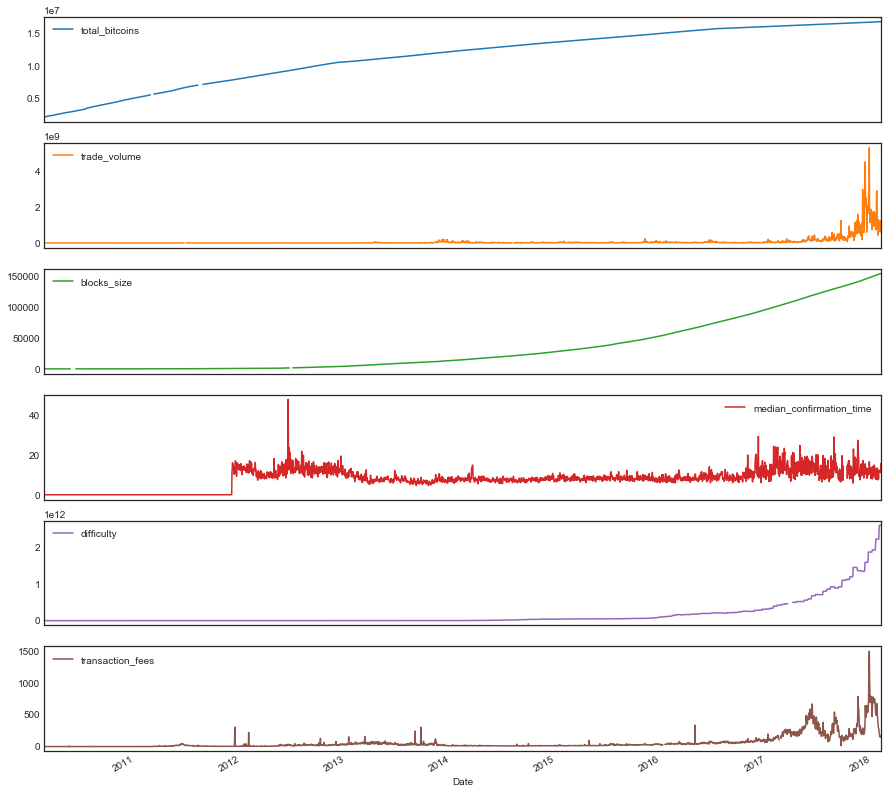

In [11]:
data[["total_bitcoins","trade_volume","blocks_size",
      "median_confirmation_time", "difficulty","transaction_fees"]].plot(subplots=True, figsize=(15, 15)); plt.legend(loc='best')

The ColsToImpute columns below have mostly a linear trend near the missing values. So, we are using a linear interpolation method with time to impute them.
After this, only the median_confirmation_time column will have missing values and it is reasonable to fill them using the mean value because it has most of it's values 0 and 47 with mean around 7.5

In [12]:
ColsToImpute = ["total_bitcoins","trade_volume","blocks_size","difficulty","transaction_fees"]
data[ColsToImpute] = data[ColsToImpute].interpolate(method="time")

In [13]:
data = data.fillna(data.mean())

In [14]:
data = data.reset_index()
test = test.reset_index()
print(data.head())
print(test.head())

        Date  market_price  total_bitcoins  market_cap  trade_volume  \
0 2010-02-17           0.0       2043200.0         0.0           0.0   
1 2010-02-18           0.0       2054650.0         0.0           0.0   
2 2010-02-19           0.0       2063600.0         0.0           0.0   
3 2010-02-20           0.0       2074700.0         0.0           0.0   
4 2010-02-21           0.0       2085400.0         0.0           0.0   

   blocks_size  avg_block_size  n_orphaned_blocks  n_transactions_per_block  \
0          0.0        0.000235                  0                       1.0   
1          0.0        0.000241                  0                       1.0   
2          0.0        0.000228                  0                       1.0   
3          0.0        0.000218                  0                       1.0   
4          0.0        0.000234                  0                       1.0   

   median_confirmation_time                ...                 \
0                       0.0

In [15]:
data = data.drop('Date', 1)
test = test.drop('Date', 1)

In [16]:
print(data.columns)
print(test.columns)

Index(['market_price', 'total_bitcoins', 'market_cap', 'trade_volume',
       'blocks_size', 'avg_block_size', 'n_orphaned_blocks',
       'n_transactions_per_block', 'median_confirmation_time', 'hash_rate',
       'difficulty', 'miners_revenue', 'transaction_fees',
       'cost_per_transaction_percent', 'cost_per_transaction',
       'n_unique_addresses', 'n_transactions', 'n_transactions_total',
       'n_transactions_excluding_popular',
       'n_transactions_excluding_chains_longer_than_100', 'output_volume',
       'estimated_transaction_volume', 'estimated_transaction_volume_usd'],
      dtype='object')
Index(['total_bitcoins', 'market_cap', 'trade_volume', 'blocks_size',
       'avg_block_size', 'n_orphaned_blocks', 'n_transactions_per_block',
       'median_confirmation_time', 'hash_rate', 'difficulty', 'miners_revenue',
       'transaction_fees', 'cost_per_transaction_percent',
       'cost_per_transaction', 'n_unique_addresses', 'n_transactions',
       'n_transactions_total'

In [17]:
X_btc = data[data.columns[1:len(data.columns)]]
y_btc = data['market_price']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_btc, y_btc, test_size=0.3, random_state=1)

In [19]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
for num_neighbors in range(1, 20):
    knnreg = KNeighborsRegressor(n_neighbors = num_neighbors).fit(X_train_scaled, y_train)

    #print(knnreg.predict(X_test_scaled))
    print('R-squared train score for {} neighbors: {:.4f}'
         .format(num_neighbors, knnreg.score(X_train_scaled, y_train)))
    print('R-squared test score for {} neighbors: {:.4f}'
         .format(num_neighbors, knnreg.score(X_test_scaled, y_test)))

R-squared train score for 1 neighbors: 1.0000
R-squared test score for 1 neighbors: 0.9953
R-squared train score for 2 neighbors: 0.9984
R-squared test score for 2 neighbors: 0.9956
R-squared train score for 3 neighbors: 0.9975
R-squared test score for 3 neighbors: 0.9951
R-squared train score for 4 neighbors: 0.9969
R-squared test score for 4 neighbors: 0.9941
R-squared train score for 5 neighbors: 0.9964
R-squared test score for 5 neighbors: 0.9940
R-squared train score for 6 neighbors: 0.9958
R-squared test score for 6 neighbors: 0.9937
R-squared train score for 7 neighbors: 0.9955
R-squared test score for 7 neighbors: 0.9932
R-squared train score for 8 neighbors: 0.9950
R-squared test score for 8 neighbors: 0.9931
R-squared train score for 9 neighbors: 0.9942
R-squared test score for 9 neighbors: 0.9925
R-squared train score for 10 neighbors: 0.9938
R-squared test score for 10 neighbors: 0.9925
R-squared train score for 11 neighbors: 0.9934
R-squared test score for 11 neighbors: 0.

In [21]:
linreg = LinearRegression().fit(X_train, y_train)

print('R-squared score (training): {:.6f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.6f}'
     .format(linreg.score(X_test, y_test)))

R-squared score (training): 0.999964
R-squared score (test): 0.999936


In [22]:
linreg.predict(test)

array([ 9056.3852683 ,  8886.21618894,  9072.94767024,  8399.31031719,
        6764.58463296,  7597.0696744 ,  8075.93685129,  8261.62012136,
        8554.3251848 ,  8302.26007904,  8357.28023404,  8779.653565  ,
        8557.93686502,  9281.38601285])

In [23]:
linregscaled = LinearRegression().fit(X_train_scaled, y_train)

print('R-squared score (training): {:.6f}'
     .format(linregscaled.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.6f}'
     .format(linregscaled.score(X_test_scaled, y_test)))

R-squared score (training): 0.999964
R-squared score (test): 0.999936


In [24]:
Final_test_scaled = scaler.transform(test)

In [25]:
linregscaled.predict(Final_test_scaled)

array([ 9056.38579539,  8886.21672001,  9072.94819971,  8399.31086593,
        6764.58522542,  7597.07024254,  8075.9374927 ,  8261.62075865,
        8554.32581402,  8302.26071607,  8357.28087109,  8779.65418743,
        8557.93749459,  9281.38662096])

In [26]:
linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)
print('R-squared score (training): {:.7f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.7f}'
     .format(linridge.score(X_test_scaled, y_test)))

R-squared score (training): 0.9690109
R-squared score (test): 0.9687682


In [27]:
print('Ridge regression: Trying different values of alpha')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linRidge = Ridge(alpha=this_alpha).fit(X_train_scaled, y_train)
    r2_train = linRidge.score(X_train_scaled, y_train)
    r2_test = linRidge.score(X_test_scaled, y_test)
    num_coeff_big = np.sum(abs(linRidge.coef_) > 1.0)
    print('Alpha = {:.7f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.7f}, r-squared test: {:.7f}\n'
         .format(this_alpha, num_coeff_big, r2_train, r2_test))

Ridge regression: Trying different values of alpha
Alpha = 0.0000000
num abs(coeff) > 1.0: 21, r-squared training: 0.9999643, r-squared test: 0.9999359

Alpha = 1.0000000
num abs(coeff) > 1.0: 22, r-squared training: 0.9964708, r-squared test: 0.9961173

Alpha = 10.0000000
num abs(coeff) > 1.0: 22, r-squared training: 0.9825136, r-squared test: 0.9822755

Alpha = 20.0000000
num abs(coeff) > 1.0: 22, r-squared training: 0.9690109, r-squared test: 0.9687682

Alpha = 50.0000000
num abs(coeff) > 1.0: 19, r-squared training: 0.9240593, r-squared test: 0.9234065

Alpha = 100.0000000
num abs(coeff) > 1.0: 22, r-squared training: 0.8523003, r-squared test: 0.8506465

Alpha = 1000.0000000
num abs(coeff) > 1.0: 21, r-squared training: 0.4530536, r-squared test: 0.4612201



In [28]:
linlasso = Lasso(alpha=2.0, max_iter=1000).fit(X_train_scaled, y_train)

print('R-squared score (training): {:.7f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.7f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_train), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

R-squared score (training): 0.9998485
R-squared score (test): 0.9998136

Features with non-zero weight (sorted by absolute magnitude):
	market_cap, 18735.832
	cost_per_transaction, 510.314
	blocks_size, 89.188
	n_transactions_total, 6.361


In [29]:
print('Trying Lasso for different values of alpha')

for alpha in [0.1, 0.5, 1, 2, 3, 5, 10, 20, 50]:
    linLasso = Lasso(alpha, max_iter=10000).fit(X_train_scaled, y_train)
    r2_train = linLasso.score(X_train_scaled, y_train)
    r2_test = linLasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}\nr-squared training: {:.7f}, \
r-squared test: {:.7f}\n'
         .format(alpha, np.sum(linLasso.coef_ != 0), r2_train, r2_test))

Trying Lasso for different values of alpha
Alpha = 0.10
Features kept: 9
r-squared training: 0.9999317, r-squared test: 0.9999013

Alpha = 0.50
Features kept: 6
r-squared training: 0.9999187, r-squared test: 0.9998895

Alpha = 1.00
Features kept: 8
r-squared training: 0.9999031, r-squared test: 0.9998701

Alpha = 2.00
Features kept: 4
r-squared training: 0.9998485, r-squared test: 0.9998136

Alpha = 3.00
Features kept: 4
r-squared training: 0.9997858, r-squared test: 0.9997442

Alpha = 5.00
Features kept: 4
r-squared training: 0.9995783, r-squared test: 0.9995290

Alpha = 10.00
Features kept: 4
r-squared training: 0.9986030, r-squared test: 0.9985393

Alpha = 20.00
Features kept: 3
r-squared training: 0.9946768, r-squared test: 0.9946016

Alpha = 50.00
Features kept: 2
r-squared training: 0.9677923, r-squared test: 0.9682274



In [30]:
poly = PolynomialFeatures(degree=2)

X_F1_poly = poly.fit_transform(X_btc)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_btc, test_size = 0.3, random_state = 1)

polyreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) R-squared score (training): {:.7f}'
     .format(polyreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.7f}\n'
     .format(polyreg.score(X_test, y_test)))
print('Polynomial Regression with Regularization')

polyRidgeReg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) R-squared score (training): {:.7f}'
     .format(polyRidgeReg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.7f}'
     .format(polyRidgeReg.score(X_test, y_test)))

(poly deg 2) R-squared score (training): 0.9999725
(poly deg 2) R-squared score (test): 0.9999065

Polynomial Regression with Regularization
(poly deg 2 + ridge) R-squared score (training): 0.9999983
(poly deg 2 + ridge) R-squared score (test): 0.9999916


C:\Users\Rahul123\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.203900924627795e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)


In [31]:
#SVM

# X_train, X_test, y_train, y_test = train_test_split(X_btc, y_btc, random_state = 1, test_size = 0.3)

# svr = SVR(kernel = 'linear', epsilon = 0.01)
# svr.fit(X_train, y_train)
# print(svr.score(X_train, y_train))
# print(svr.score(X_test, y_test))

In [32]:
# linreg = Lasso()

# scores = cross_val_score(linreg, X_btc, y_btc, cv = 5)
# print("Cross validation scores: {}".format(scores))
# print("Average cross-validation scroe: {:.6f}".format(scores.mean()))